In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 4.4 MB/s            


In [3]:
df = pd.read_excel("../input/flight-fare-prediction-mh/Data_Train.xlsx")
pd.set_option('display.max_columns',None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.shape

(10683, 11)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.reset_index()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Handling date of journey

In [8]:
df['journey_day'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['journey_month'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
#Not taking year as the whole data is of same year

In [9]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [10]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


## Handling Dep_time

In [11]:
df['dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)

In [12]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


## Handling Arrival_time

In [13]:
df['Arr_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [14]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hr,dep_min,Arr_hr,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


## Handling Duration 

In [15]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
df['Duration_hrs'] = duration_hours
df['Duration_mins'] = duration_mins
df.drop(['Duration'],axis=1,inplace=True)

In [17]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month', 'dep_hr',
       'dep_min', 'Arr_hr', 'Arr_min', 'Duration_hrs', 'Duration_mins'],
      dtype='object')

In [18]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hr,dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling categorical data
1. <font color='yellow'> Nominal Data </font> -> data are not in any order -> <font color='green'> OneHotEncorder </font> is used
2. <font color='yellow'> Ordinal Data </font>-> data are in order -> <font color='green'> LabelEncoder </font> is used

In [19]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

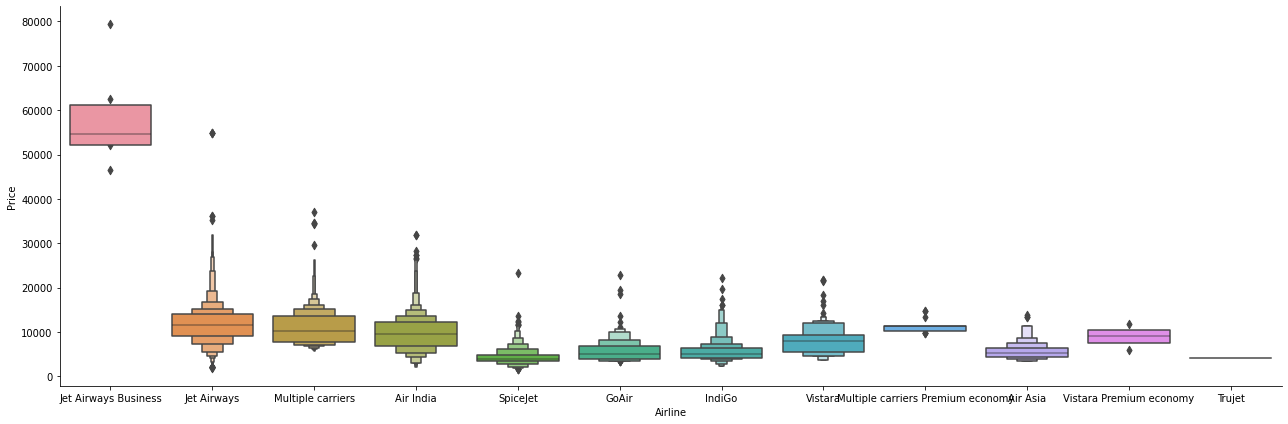

In [20]:
sns.catplot(y = "Price",x = "Airline",data=df.sort_values("Price",ascending=False), 
            kind="boxen",height=6,aspect=3)
sns.set()

In [21]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Handling source column

In [22]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

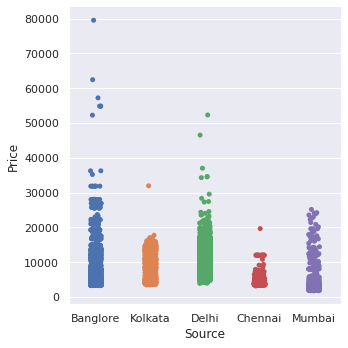

In [23]:
sns.catplot(x="Source", y="Price", data=df)

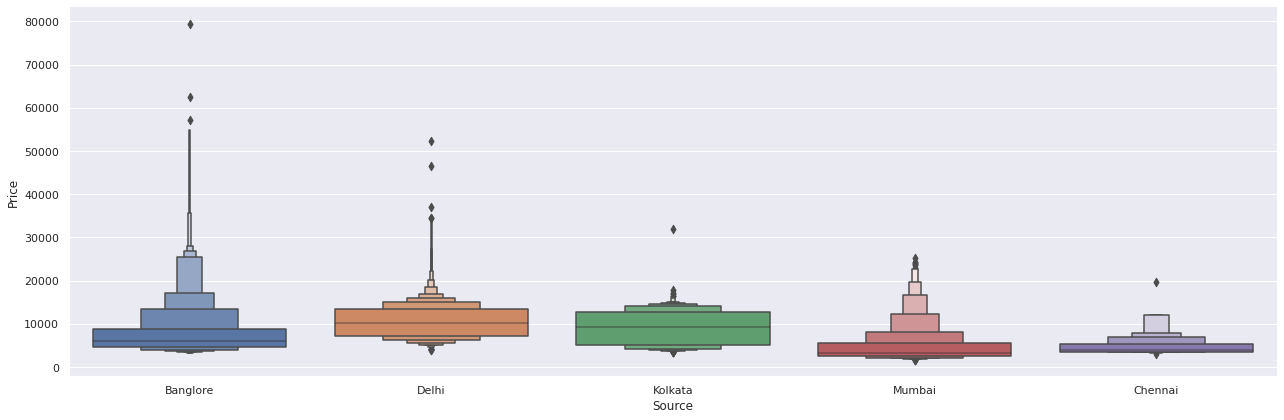

In [24]:
sns.catplot(y="Price",x='Source',data=df.sort_values("Price",ascending=False), 
            kind="boxen",height=6,aspect=3)

In [25]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Handling Destination Column

In [26]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## Route

In [28]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
# Additional_info contains almost 85% no info
# route and total_stops are the same like for this CCU → IXR → BBI → BLR
# total stops are 2
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [30]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [32]:
df_new = pd.concat([df,Airline,Source,Destination],axis=1)
df_new.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [33]:
df_new.head()

,Total_Stops,Price,journey_day,journey_month,dep_hr,dep_min,Arr_hr,Arr_min,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
df_new.shape #data_train

(10682, 30)

In [35]:
df_new.dropna(axis=0,inplace=True)

## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. <font color='green'> Heatmap </font>
2. <font color='green'> feature_importance_ </font>
3. <font color='green'> SelectKBest </font>

In [36]:
X = df_new.drop(['Price'],axis=1)
y = df_new['Price']

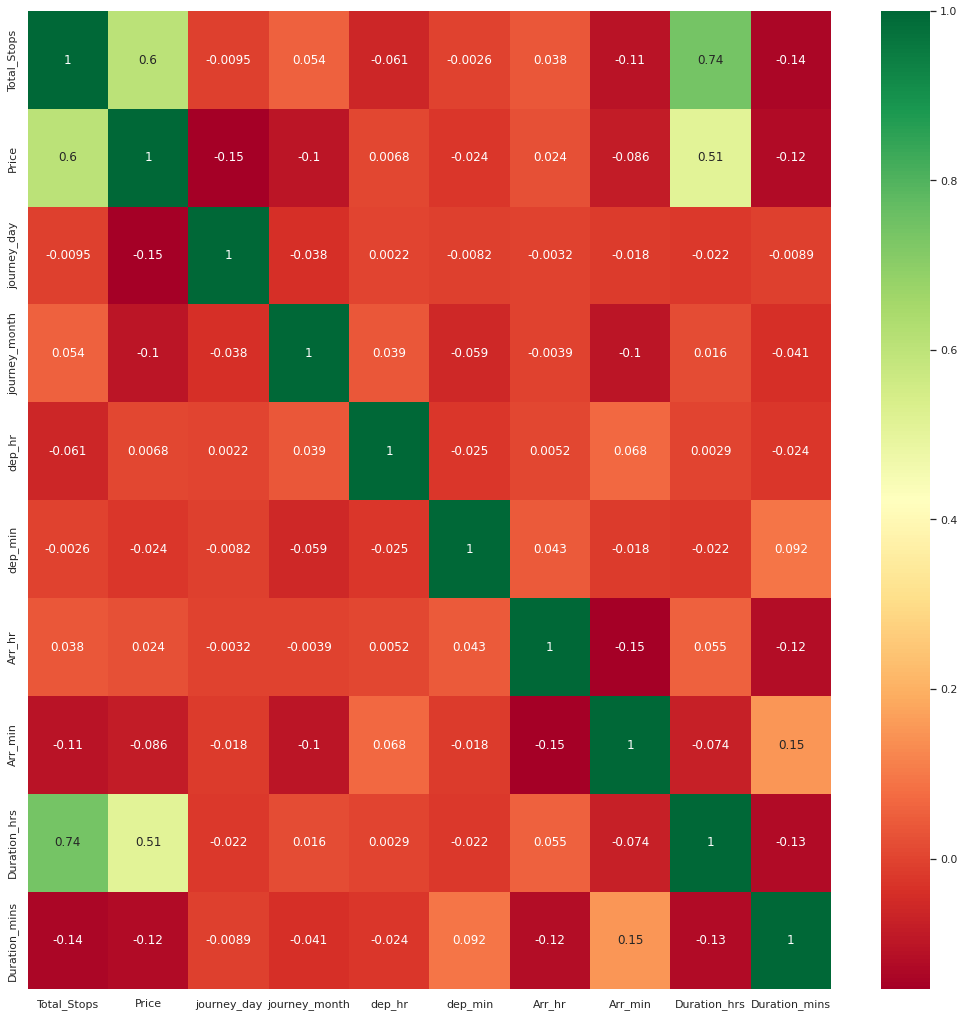

In [37]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [38]:
# Important Feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(selection.feature_importances_)

[2.40984519e-01 1.44342081e-01 5.28901791e-02 2.38694505e-02
 2.16049853e-02 2.78439610e-02 1.90726499e-02 1.06688386e-01
 1.75607935e-02 1.01254027e-02 2.18336969e-03 1.95966185e-02
 1.38829676e-01 6.79631053e-02 1.80485285e-02 9.02532371e-04
 2.74980076e-03 8.71088416e-05 4.86085626e-03 8.46987868e-05
 4.78537719e-04 1.17950930e-02 3.30988918e-03 6.54553328e-03
 1.25178338e-02 1.46515326e-02 5.22710705e-03 5.42495298e-04
 2.46432752e-02]


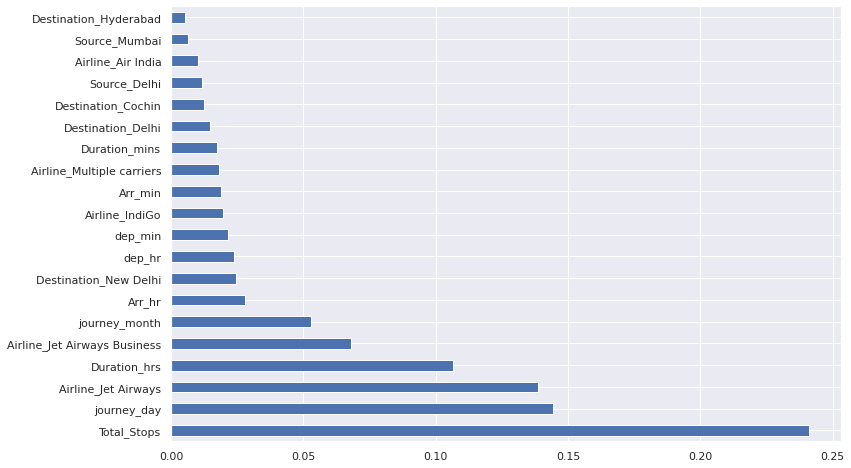

In [40]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Building 
Random Forest

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
from catboost import CatBoostRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

cat = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cat.fit(X_train, y_train, use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 4463.7896127	total: 54.5ms	remaining: 27.2s
50:	learn: 2185.5302111	total: 295ms	remaining: 2.6s
100:	learn: 1860.1706016	total: 535ms	remaining: 2.11s
150:	learn: 1685.4567462	total: 746ms	remaining: 1.72s
200:	learn: 1563.6553415	total: 957ms	remaining: 1.42s
250:	learn: 1504.6924292	total: 1.15s	remaining: 1.14s
300:	learn: 1437.2979277	total: 1.36s	remaining: 898ms
350:	learn: 1390.5936948	total: 1.56s	remaining: 664ms
400:	learn: 1338.3785308	total: 1.77s	remaining: 437ms
450:	learn: 1288.5315826	total: 1.98s	remaining: 215ms
499:	learn: 1245.6393639	total: 2.19s	remaining: 0us


In [43]:
y_pred = cat.predict(X_test)
print("Training Score : ",cat.score(X_train, y_train))
print("Testing Score : ",cat.score(X_test, y_test))

Training Score :  0.9267744223681392
Testing Score :  0.8619408700986333


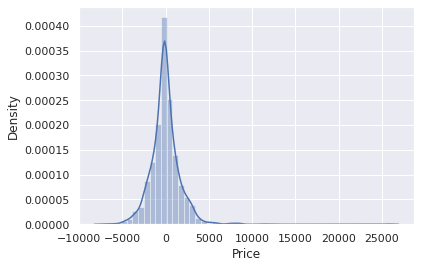

In [44]:
sns.distplot(y_test-y_pred)
plt.show()

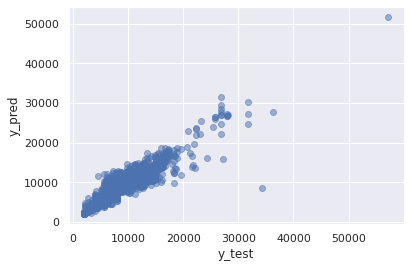

In [45]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [46]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 1155.4936771373232
MSE: 2976838.7349980376
RMSE: 1725.3517713782421
r2_score: 0.8619408700986333
